In [18]:
import pandas as pd
import numpy as np
print("Libraries imported.")

# 1. IMPORT DATA
gdrive_link = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/edit?usp=sharing"
export_link = gdrive_link.replace("/edit?usp=sharing", "/export?format=xlsx")

# Use 'openpyxl' engine for reliability
all_city_dfs = pd.read_excel(export_link, sheet_name=None, engine='openpyxl')
print("Data downloaded.")

# 2. MERGE DATA
all_data_list = []
for city_name, city_df in all_city_dfs.items():
    # Standardize city name to lowercase on creation
    city_df['city'] = city_name.strip().lower() 
    all_data_list.append(city_df)
    
df = pd.concat(all_data_list, ignore_index=True)
print(f"Data merged. Shape is: {df.shape}")

# 3. BASIC CLEANING
# Drop 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
# Rename 'realSum' to 'Price'
df = df.rename(columns={'realSum': 'Price'})

# Create 'country' column
# This map uses lowercase keys, which will match our clean 'city' column
country_map = {
    'amsterdam': 'Netherlands',
    'athens': 'Greece',
    'barcelona': 'Spain',
    'berlin': 'Germany',
    'budapest': 'Hungary',
    'lisbon': 'Portugal',
    'london': 'UK',
    'paris': 'France',
    'rome': 'Italy',
    'vienna': 'Austria'
}
df['country'] = df['city'].map(country_map)
print("Basic cleaning done.")

# 4. ADVANCED CLEANING
# Create one 'room_type' column
conditions_room = [
    (df['room_shared'] == 1),
    (df['room_private'] == 1)
]
choices_room = ['Shared room', 'Private room']
df['room_type'] = np.select(conditions_room, choices_room, default='Entire home/apt')
# Drop old room columns
df = df.drop(columns=['room_shared', 'room_private'])
print("Advanced cleaning for room_type done.")

# Create 'host_listings_category' using 'biz' and 'multi'
conditions_host = [
    (df['biz'] == 1),    # 5+ listings
    (df['multi'] == 1)   # 2-4 listings
]
choices_host = ['5+ listings', '2-4 listings']
df['host_listings_category'] = np.select(conditions_host, choices_host, default='One listing')
print("Advanced cleaning for host_listings_category done.")

# 5. FINAL CHECK
print("\n--- Cleaning Complete. Final DataFrame Info: ---")
df.info()

Libraries imported.
Data downloaded.
Data merged. Shape is: (51707, 21)
Basic cleaning done.
Advanced cleaning for room_type done.
Advanced cleaning for host_listings_category done.

--- Cleaning Complete. Final DataFrame Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  int64  
 3   host_is_superhost           51707 non-null  bool   
 4   multi                       51707 non-null  int64  
 5   biz                         51707 non-null  int64  
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   bedrooms                    51707 non-null  int64  
 9   dist                       

In [19]:
# This will show us the exact city names as they are in the column
print(df['city'].unique())

['amsterdam_weekdays' 'amsterdam_weekends' 'athens_weekdays'
 'athens_weekends' 'berlin_weekends' 'berlin_weekdays'
 'barcelona_weekdays' 'barcelona_weekends' 'budapest_weekdays'
 'budapest_weekends' 'lisbon_weekdays' 'lisbon_weekends' 'london_weekdays'
 'london_weekends' 'paris_weekdays' 'paris_weekends' 'rome_weekdays'
 'rome_weekends' 'vienna_weekdays' 'vienna_weekends']


In [20]:
# --- FIXING THE 'city', 'country', AND 'day_type' COLUMNS ---

# 1. Create the 'day_type' column
# We check if the 'city' column string contains 'weekends'
df['day_type'] = np.where(df['city'].str.contains('weekends'), 'Weekend', 'Weekday')

# 2. Fix the 'city' column
# We split the string by '_' (e.g., 'amsterdam_weekdays') and take the first part
df['city'] = df['city'].str.split('_').str[0]

# 3. Create the 'country' column
# Now this map will work perfectly with the clean 'city' column
country_map = {
    'amsterdam': 'Netherlands',
    'athens': 'Greece',
    'barcelona': 'Spain',
    'berlin': 'Germany',
    'budapest': 'Hungary',
    'lisbon': 'Portugal',
    'london': 'UK',
    'paris': 'France',
    'rome': 'Italy',
    'vienna': 'Austria'
}
df['country'] = df['city'].map(country_map)

# 4. FINAL CHECK
print("--- DataFrame Fixed. Final Info: ---")
df.info()

print("\n--- New Columns Check: ---")
print("Unique cities:", df['city'].unique())
print("Unique day types:", df['day_type'].unique())
print("Country non-nulls:", df['country'].isnull().sum())

--- DataFrame Fixed. Final Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  int64  
 3   host_is_superhost           51707 non-null  bool   
 4   multi                       51707 non-null  int64  
 5   biz                         51707 non-null  int64  
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   bedrooms                    51707 non-null  int64  
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  attr_index                  51707 non-null  float64
 12  attr_index_norm             51707 non-null  float64

In [21]:
# 1. Display the first, the last and a random sample of 7 entries
print("--- Head (First 5 Rows): ---")
print(df.head())

print("\n--- Tail (Last 5 Rows): ---")
print(df.tail())

print("\n--- Random Sample (7 Rows): ---")
print(df.sample(7))


# 2. Basic summary statistics for numerical variables
print("\n--- Numeric Statistics (for your report): ---")
print(df.describe())

# 3. Basic summary statistics for categorical variables
print("\n--- Categorical Statistics (for your report): ---")
# This includes 'object', 'bool', and 'category' types
print(df.describe(include=['object', 'bool', 'category']))

--- Head (First 5 Rows): ---
        Price     room_type  person_capacity  host_is_superhost  multi  biz  \
0  194.033698  Private room                2              False      1    0   
1  344.245776  Private room                4              False      0    0   
2  264.101422  Private room                2              False      0    1   
3  433.529398  Private room                4              False      0    1   
4  485.552926  Private room                2               True      0    0   

   cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  ...  \
0                  10                          93         1  5.022964  ...   
1                   8                          85         1  0.488389  ...   
2                   9                          87         1  5.748312  ...   
3                   9                          90         2  0.384862  ...   
4                  10                          98         1  0.544738  ...   

   attr_index  attr_index_n

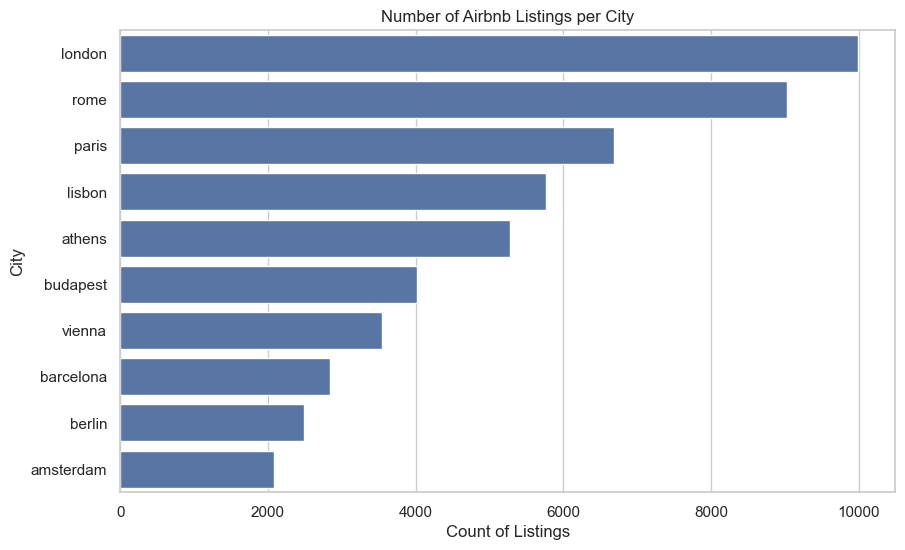

In [22]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='city', order=df['city'].value_counts().index)
plt.title('Number of Airbnb Listings per City')
plt.xlabel('Count of Listings')
plt.ylabel('City')
plt.show()

# Don't forget to save the plot for your report!
# You can right-click the plot to save, or add this line:
# plt.savefig('listings_per_city.png', bbox_inches='tight')

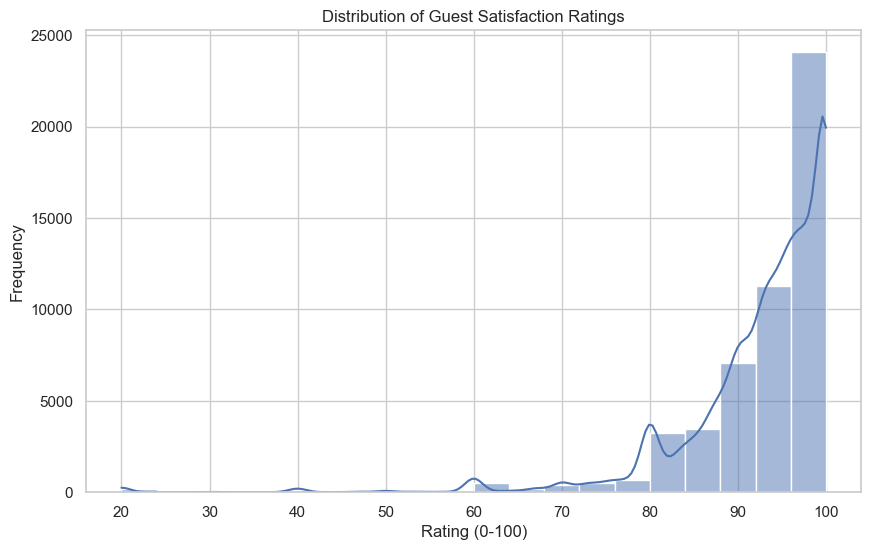

In [23]:
# Plot the distribution of guest_satisfaction_overall ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['guest_satisfaction_overall'], bins=20, kde=True)
plt.title('Distribution of Guest Satisfaction Ratings')
plt.xlabel('Rating (0-100)')
plt.ylabel('Frequency')
plt.show()

Plotting Price Distributions...


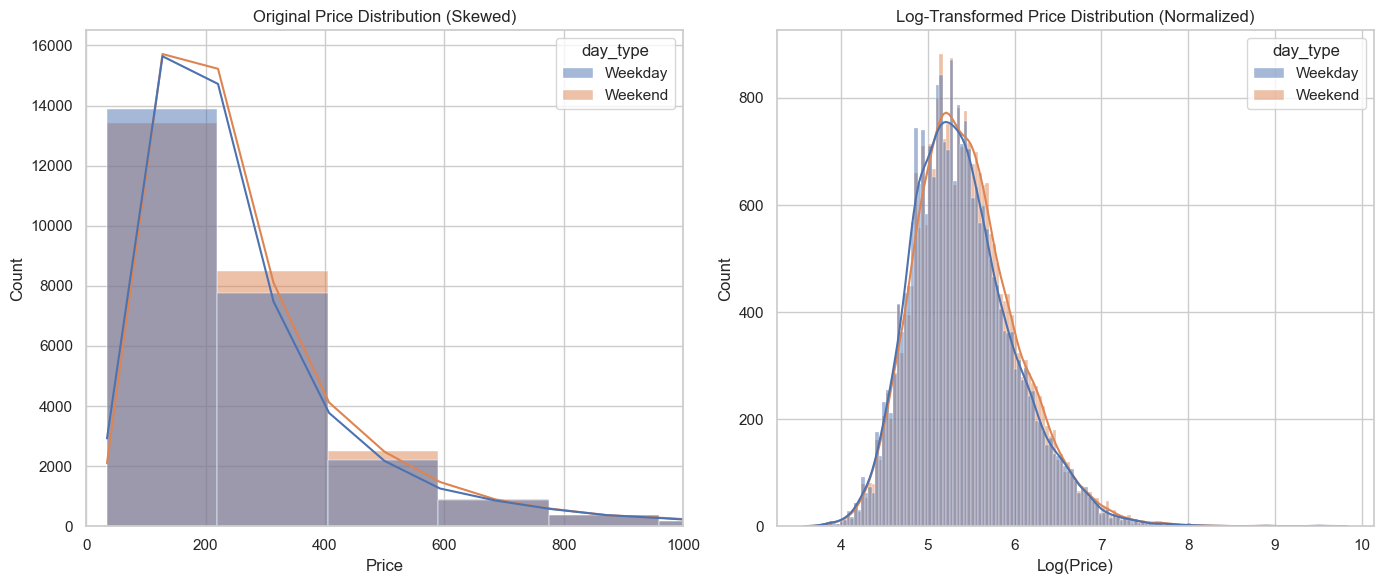

In [24]:
# Your instruction: Plot distribution of price for weekday/weekend and check skewness
 
# Create the log-transformed price column (add 1 to avoid log(0))
df['Price_log'] = np.log(df['Price'] + 1)

print("Plotting Price Distributions...")
plt.figure(figsize=(14, 6))

# Plot 1: Original Price (highly skewed)
plt.subplot(1, 2, 1)
# We'll use a histplot and cap the x-axis to see the main distribution
sns.histplot(data=df, x='Price', hue='day_type', kde=True, bins=100)
plt.title('Original Price Distribution (Skewed)')
plt.xlabel('Price')
plt.xlim(0, 1000) # Cap x-axis to see the main part

# Plot 2: Log-Transformed Price (normalized)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Price_log', hue='day_type', kde=True)
plt.title('Log-Transformed Price Distribution (Normalized)')
plt.xlabel('Log(Price)')

plt.tight_layout()
plt.show()

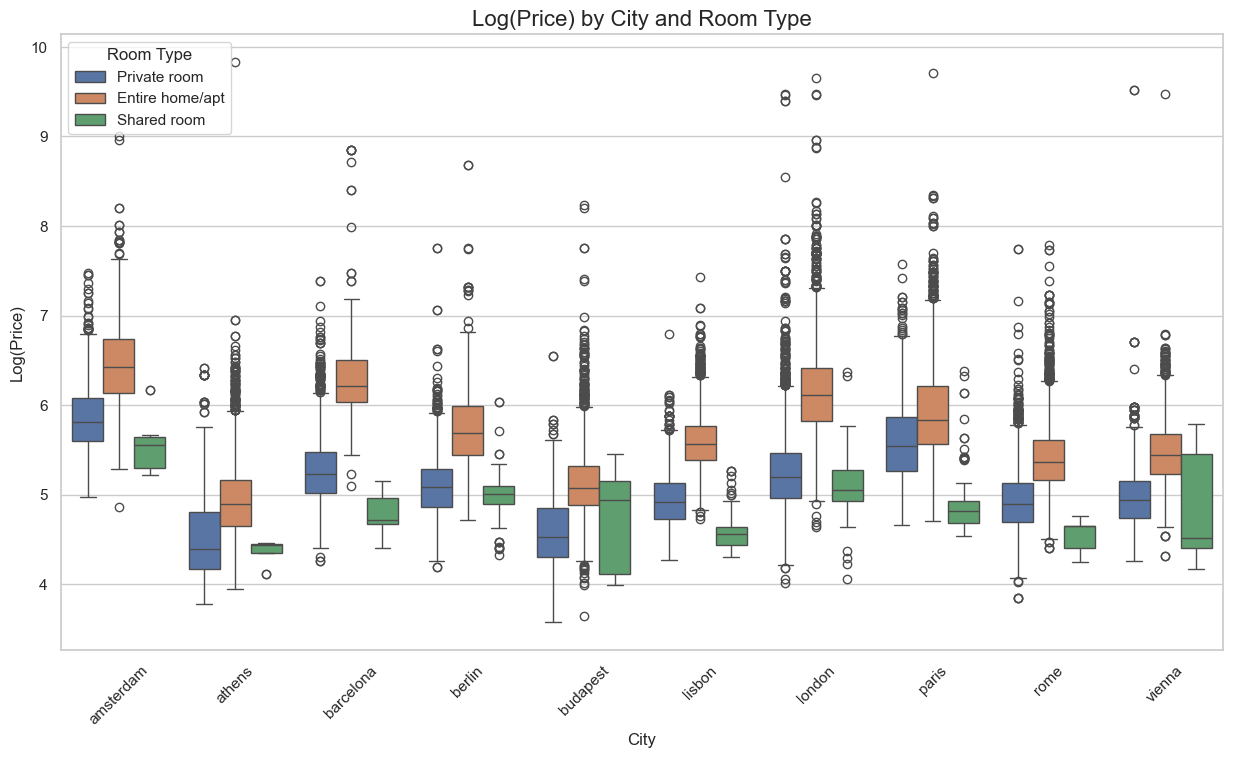

In [25]:
# Your instruction: Is renting an entire home/apt more expensive? Does that depend on the city?
 
plt.figure(figsize=(15, 8))

# We use the 'Price_log' column we just created for a much cleaner plot
sns.boxplot(data=df, x='city', y='Price_log', hue='room_type',
            order=sorted(df['city'].unique())) # Sort cities alphabetically

plt.title('Log(Price) by City and Room Type', fontsize=16)
plt.xlabel('City')
plt.ylabel('Log(Price)')
plt.legend(title='Room Type', loc='upper left')
plt.xticks(rotation=45)
plt.show()

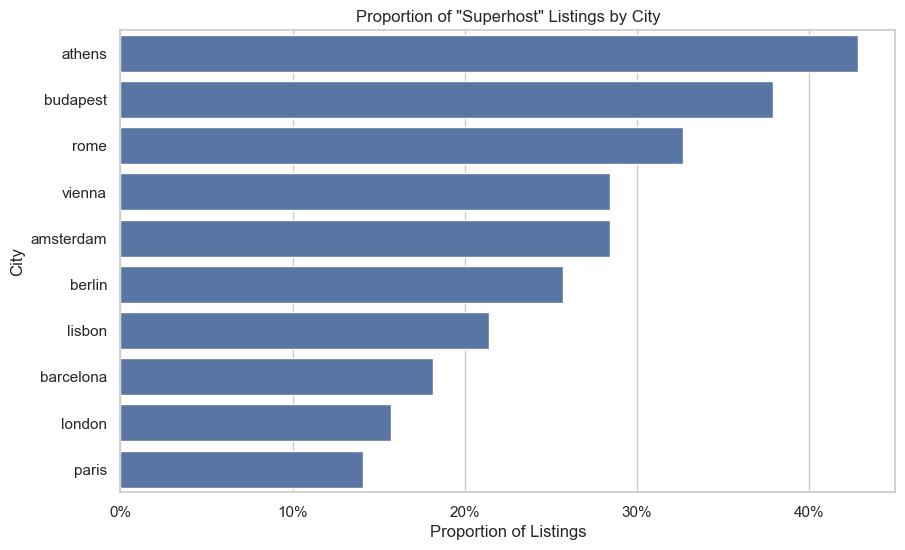

In [26]:
# Your instruction: Which city has the biggest proportion of superhosts?

# 1. Calculate the proportion of superhosts
# We group by city, get the value counts (True/False) as percentages,
# select only the 'True' (Superhost) rows, and sort
superhost_props = (df.groupby('city')['host_is_superhost']
                   .value_counts(normalize=True)
                   .unstack()[True] # Select only the 'True' proportion
                   .sort_values(ascending=False))

# 2. Plot the proportions
plt.figure(figsize=(10, 6))
sns.barplot(x=superhost_props.values, y=superhost_props.index, orient='h')
plt.title('Proportion of "Superhost" Listings by City')
plt.xlabel('Proportion of Listings')
plt.ylabel('City')

# 3. Optional: Format x-axis as percentage
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.show()

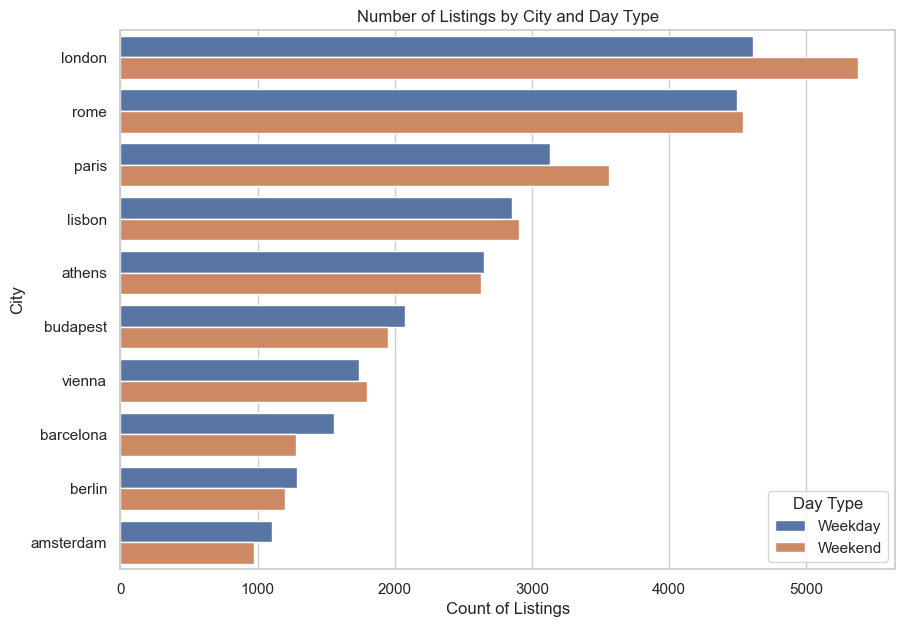

In [27]:
# Your instruction: How many listings are in each city in total and also per type of day?

plt.figure(figsize=(10, 7))
sns.countplot(data=df, y='city', hue='day_type', 
              order=df['city'].value_counts().index) # Order by total count

plt.title('Number of Listings by City and Day Type')
plt.xlabel('Count of Listings')
plt.ylabel('City')
plt.legend(title='Day Type')
plt.show()

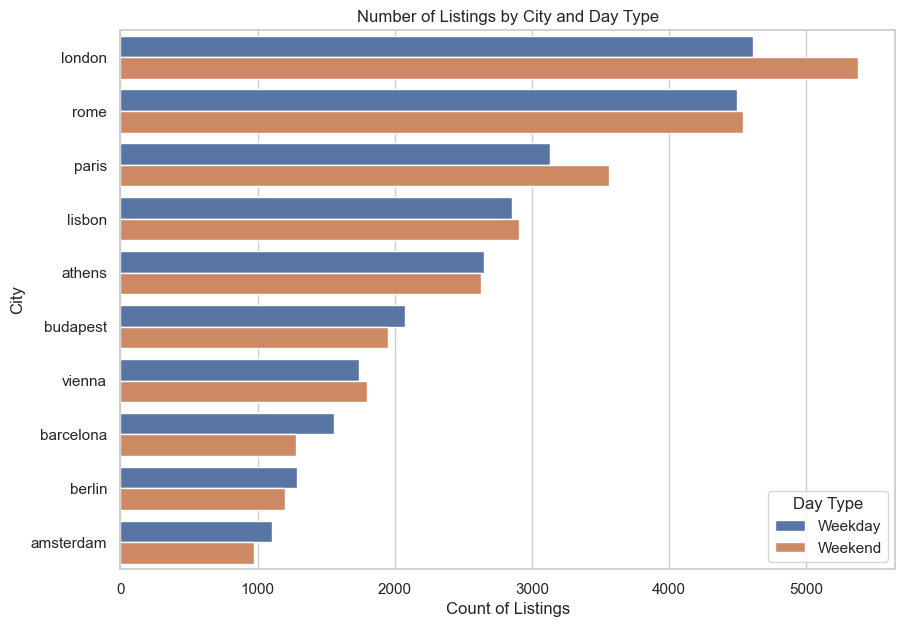

In [28]:
# Your instruction: How many listings are in each city in total and also per type of day?

plt.figure(figsize=(10, 7))
sns.countplot(data=df, y='city', hue='day_type', 
              order=df['city'].value_counts().index) # Order by total count

plt.title('Number of Listings by City and Day Type')
plt.xlabel('Count of Listings')
plt.ylabel('City')
plt.legend(title='Day Type')
plt.show()

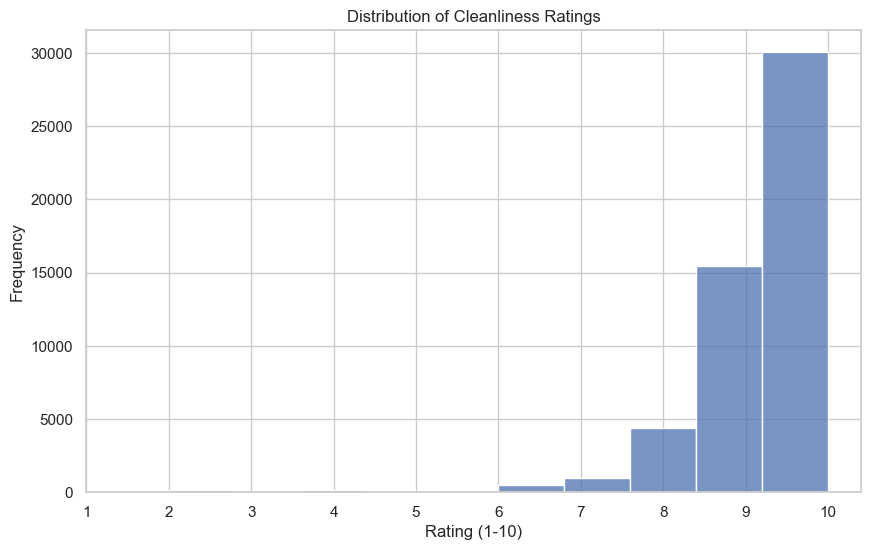

In [29]:
# Your instruction: Examine the distribution of cleanliness_rating.

plt.figure(figsize=(10, 6))
sns.histplot(df['cleanliness_rating'], bins=10, kde=False) # 'bins=10' for 1-10 ratings
plt.title('Distribution of Cleanliness Ratings')
plt.xlabel('Rating (1-10)')
plt.ylabel('Frequency')
plt.xticks(range(1, 11)) # Set x-ticks to be 1, 2, 3... 10
plt.show()

Analyzing Superhost vs. Normal Host...


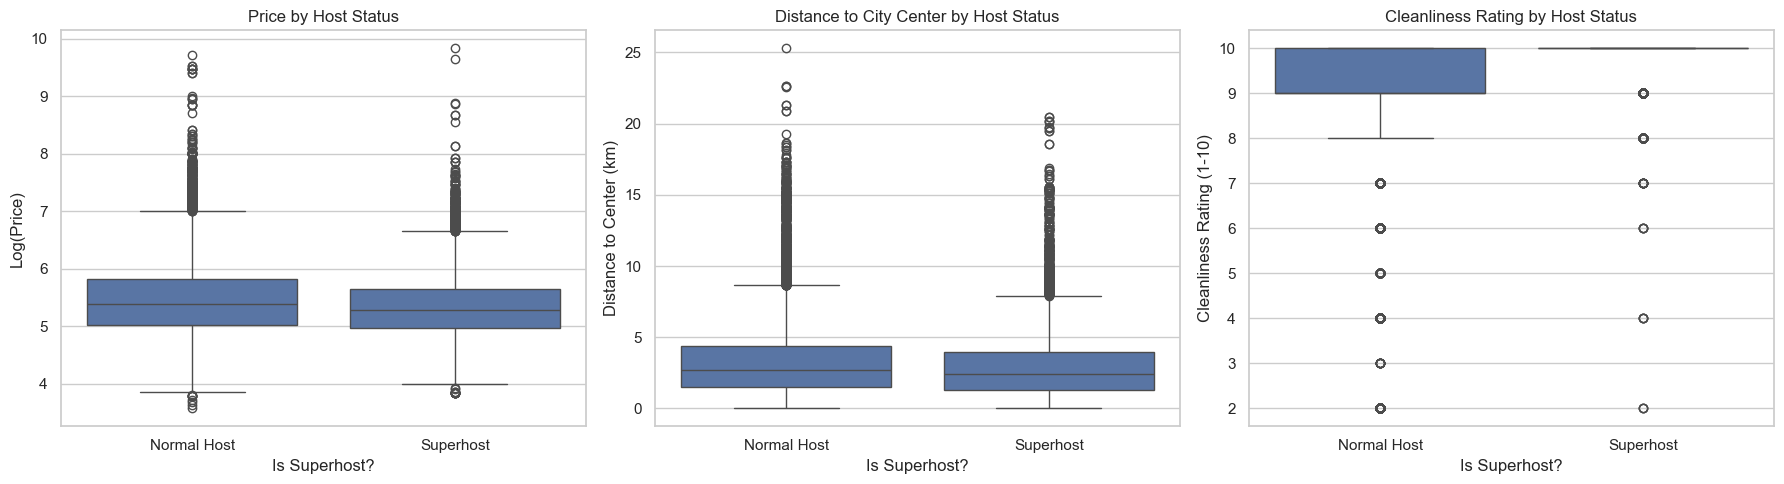


Mean distance to metro:
host_is_superhost
False    0.681903
True     0.680483
Name: metro_dist, dtype: float64


In [30]:
# Your instructions:
# 1. Are listings of superhosts more expensive than those of normal hosts?
# 2. Are superhosts closer to the city center and metro station than normal hosts?
# 3. Are superhosts cleaner than normal hosts?

print("Analyzing Superhost vs. Normal Host...")
plt.figure(figsize=(18, 5))

# Plot 1: Price (Superhost vs. Normal)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='host_is_superhost', y='Price_log')
plt.title('Price by Host Status')
plt.xlabel('Is Superhost?')
plt.ylabel('Log(Price)')
plt.xticks([False, True], ['Normal Host', 'Superhost'])

# Plot 2: Distance (Superhost vs. Normal)
plt.subplot(1, 3, 2)
# We'll check 'dist' (to city center)
sns.boxplot(data=df, x='host_is_superhost', y='dist')
plt.title('Distance to City Center by Host Status')
plt.xlabel('Is Superhost?')
plt.ylabel('Distance to Center (km)')
plt.xticks([False, True], ['Normal Host', 'Superhost'])

# Plot 3: Cleanliness (Superhost vs. Normal)
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='host_is_superhost', y='cleanliness_rating')
plt.title('Cleanliness Rating by Host Status')
plt.xlabel('Is Superhost?')
plt.ylabel('Cleanliness Rating (1-10)')
plt.xticks([False, True], ['Normal Host', 'Superhost'])

plt.tight_layout()
plt.show()

# Let's also check metro_dist with a numerical .mean()
print("\nMean distance to metro:")
print(df.groupby('host_is_superhost')['metro_dist'].mean())

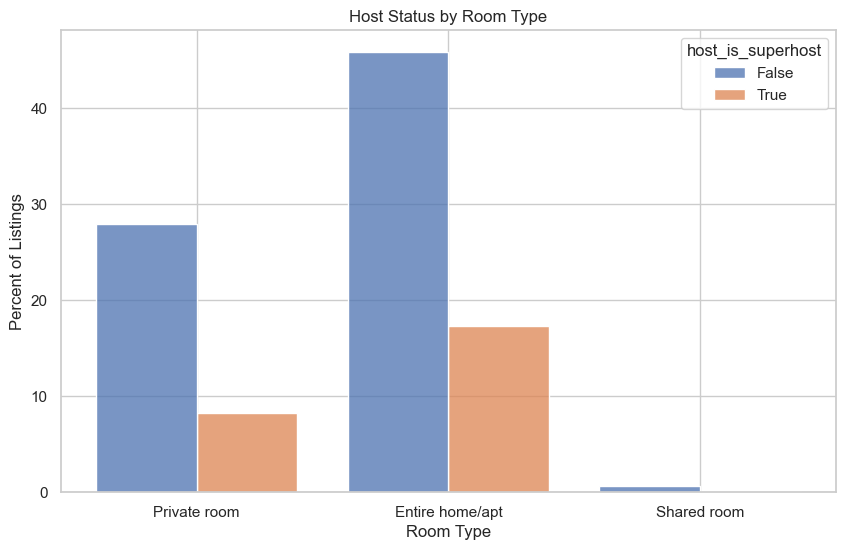

In [31]:
# Your instruction: Is there a pattern between room types and superhost status?

# We can visualize this using a normalized count plot (showing percentages)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='room_type', hue='host_is_superhost', 
             stat='percent', multiple='dodge', shrink=0.8)

plt.title('Host Status by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Percent of Listings')
plt.show()